In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
df=pd.read_csv('center_sternum.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

In [ ]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])


In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'])
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])


In [ ]:

gyroxfreq=np.fft.fft(Df['GyroY']-np.mean(Df['GyroY']))
freq=np.fft.fftfreq(d=1/log_freq, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq),'b-o', markersize=3)
#plt.xlim(-0.001,2)

## wavelet filtering

In [ ]:
import pywt
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)
#compression
div=0.1
for j in range(len(coeff)):
    mean=np.mean(coeff[j])
    coeff[j][coeff[j]<mean/div]=coeff[j][coeff[j]<mean/div]+(mean-coeff[j][coeff[j]<mean/div])
    
coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
coeff
plt.figure()
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y[:-1],label='compressed')
plt.legend()
# plt.figure()
# #plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

In [ ]:
#denoising
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)


coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
#coeff, len(coeff)
# plt.figure()
# plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

In [ ]:
a=[0.7**(i) for i in np.arange(len(coeff)-1,-1,-1)]
coeff=np.array(coeff)
for idx in range(len(coeff)):
    plt.figure()
    plt.plot(coeff[idx],alpha=0.7)
    lim=plt.xlim()
    threshold_high=np.mean(coeff[idx])+1.5*a[idx]*np.std(coeff[idx])
    threshold_low=np.mean(coeff[idx])-1.5*a[idx]*np.std(coeff[idx])
    plt.hlines(threshold_high,lim[0],lim[1])
    plt.hlines(threshold_low,lim[0],lim[1])
    coeff[idx][np.bitwise_and(coeff[idx]<threshold_high,coeff[idx]>threshold_low)]=0


In [ ]:
y1=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y1[:-1],label='filtered')
plt.legend()

<IPython.core.display.Javascript object>


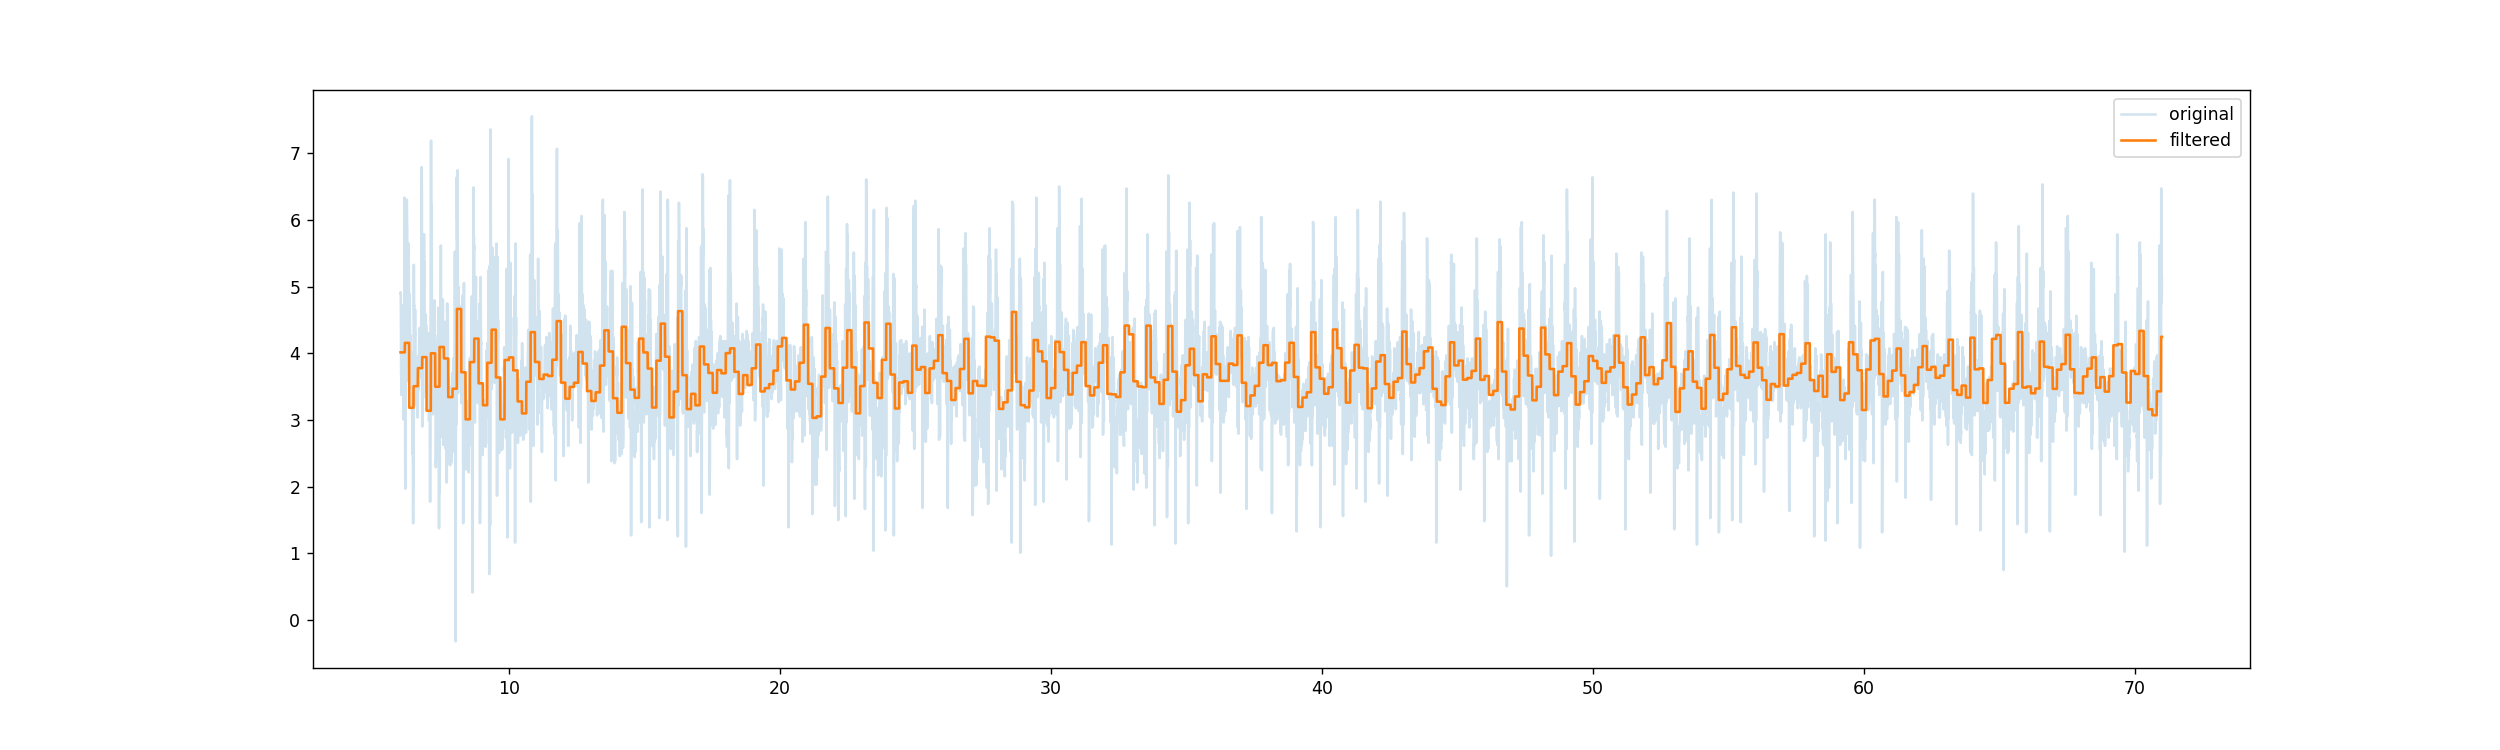

In [72]:
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')

low_cut = 7   #included in the pass_band
high_cut = 9  #excluded

coeff=np.array(coeff)
for i in np.arange(high_cut,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,low_cut):
    coeff[j]=np.zeros(len(coeff[j])) 

y2=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroY'], label='original', alpha=0.2)
plt.plot(Df['Time'],y2[:-1],label='filtered')
plt.legend()

In [73]:
#frequency range calculation

freq_range=np.ceil(max(freq))
higher_filtered =freq_range/2**(len(coeff)-high_cut)
lower_filtered  =freq_range/2**(len(coeff)-low_cut)
lower_filtered, higher_filtered

(0.78125, 3.125)

<IPython.core.display.Javascript object>


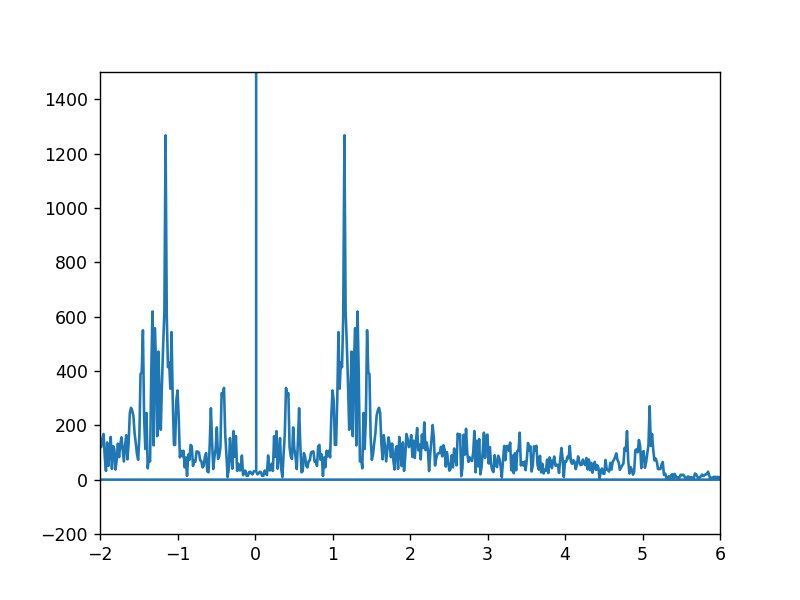

first HR:  69.23076923076924


In [94]:
filtered_freq=np.fft.fft(y2)#-np.mean(Df['GyroY']))
freq=np.fft.fftfreq(d=1/log_freq, n=len(filtered_freq)) 

%matplotlib notebook
plt.plot(freq,np.abs(filtered_freq))
plt.xlim(-2,6)
plt.ylim(-200,1500)
print("first HR: ", freq[np.argmax(np.abs(filtered_freq)[1:int(len(freq)/2)])+1]*60)

In [85]:
freq,np.abs(filtered_freq)

(array([ 0.        ,  0.01538462,  0.03076923, ..., -0.04615385,
        -0.03076923, -0.01538462]),
 array([4.82517379e+04, 3.04330393e+01, 1.96051889e+01, ...,
        2.23886958e+01, 1.96051889e+01, 3.04330393e+01]))

## Set 1

In [ ]:
df=pd.read_csv('1_Stave_supine_static.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

In [ ]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
#limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])
fig.suptitle("set 1 - accelerometer measurement")


In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'],label='')
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])
fig.suptitle("set 1 - gyroscopic measurement")

## Set 3

In [ ]:
df=pd.read_csv('3_Subject_sitting_chair.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

In [ ]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
limits=[4,68]       #set 3
#limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])
fig.suptitle("set 3 - accelerometer measurement")


In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'],label='')
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])
fig.suptitle("set 1 - gyroscopic measurement")

In [ ]:
coeff=pywt.wavedec(Df['GyroX'],'db1',mode='periodic')

coeff=np.array(coeff)
for i in np.arange(11,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,5):
    coeff[j]=np.zeros(len(coeff[j])) 

y2=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroX'], label='original', alpha=0.2)
plt.plot(Df['Time'],y2[:-1],label='filtered')
plt.legend()

In [ ]:
len(coeff)